In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
booking = pd.read_csv(r'C:\Users\Marek\Downloads\hotel_bookings.csv', sep=',')
booking

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,2015-04-22


In [23]:
booking.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [24]:
booking = booking.drop(['company'], axis=1)
booking.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

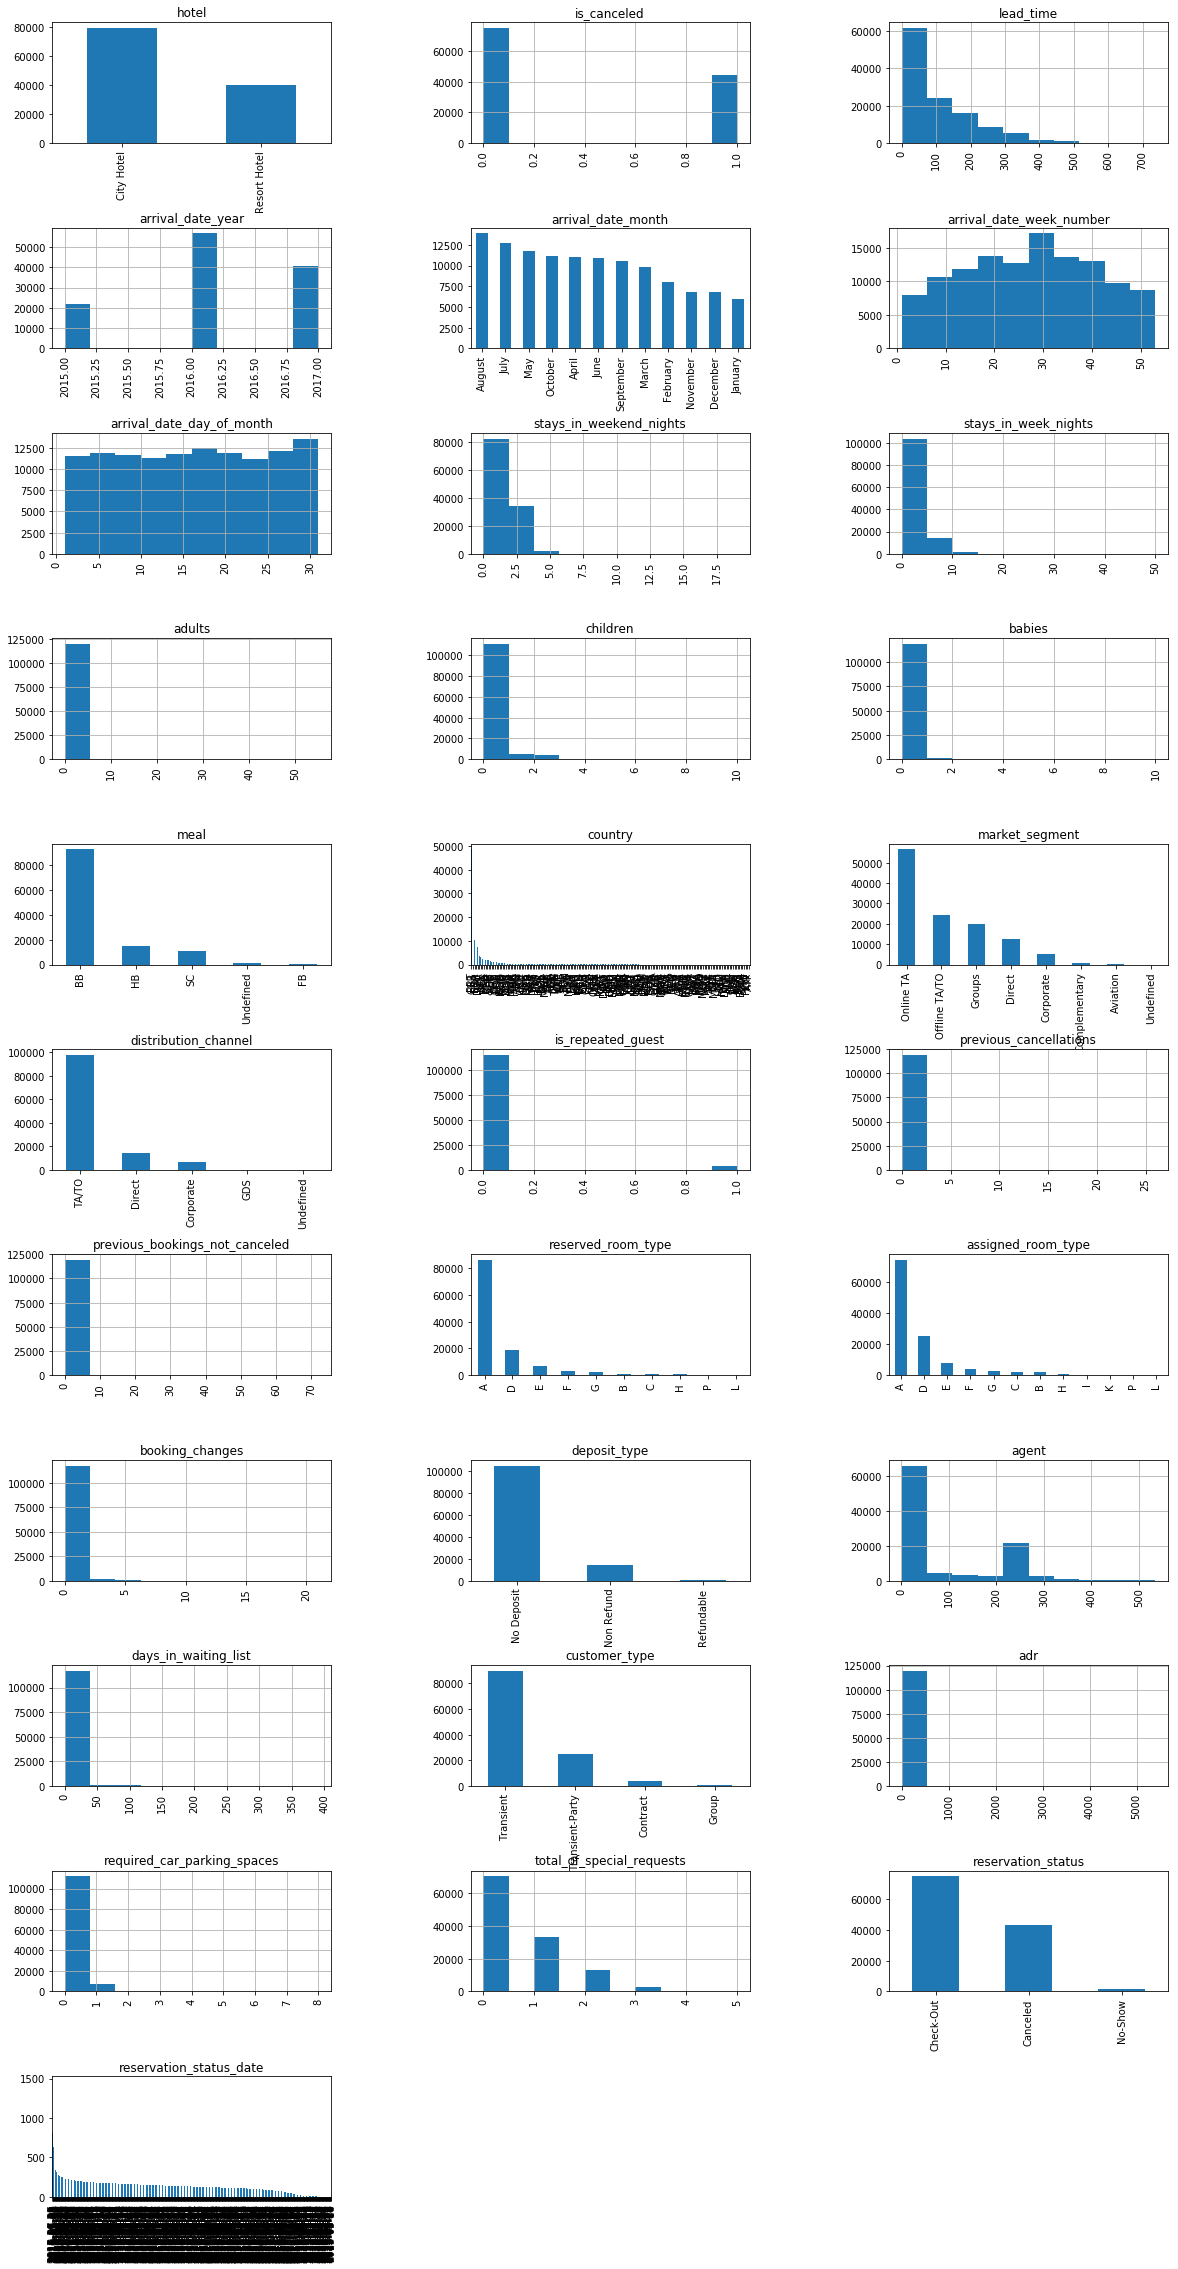

In [25]:
import math

fig=plt.figure(figsize=(20,40))

cols=3

rows=math.ceil(float(booking.shape[1])/cols)
for i,column in enumerate(booking.columns):
    ax=fig.add_subplot(rows,cols,i+1)
    ax.set_title(column)
    
    if booking.dtypes[column]==np.object:
        booking[column].value_counts().plot(kind='bar',axes=ax)
   
    else:
        booking[column].hist(axes=ax)
        plt.xticks(rotation='vertical')

plt.subplots_adjust(hspace=0.7,wspace=0.5)

In [26]:
booking=booking.dropna(axis=0)

In [27]:
booking.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [28]:
cancel_corr = booking.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.277666
total_of_special_requests         0.257934
required_car_parking_spaces       0.188298
booking_changes                   0.131714
previous_cancellations            0.117983
agent                             0.081939
days_in_waiting_list              0.052475
previous_bookings_not_canceled    0.042589
adults                            0.037057
babies                            0.032038
is_repeated_guest                 0.029913
stays_in_weekend_nights           0.023589
adr                               0.023284
arrival_date_day_of_month         0.005468
children                          0.005409
arrival_date_year                 0.004561
arrival_date_week_number          0.004172
stays_in_week_nights              0.003918
Name: is_canceled, dtype: float64

In [33]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102894 entries, 3 to 119389
Data columns (total 31 columns):
hotel                             102894 non-null object
is_canceled                       102894 non-null int64
lead_time                         102894 non-null int64
arrival_date_year                 102894 non-null int64
arrival_date_month                102894 non-null object
arrival_date_week_number          102894 non-null int64
arrival_date_day_of_month         102894 non-null int64
stays_in_weekend_nights           102894 non-null int64
stays_in_week_nights              102894 non-null int64
adults                            102894 non-null int64
children                          102894 non-null float64
babies                            102894 non-null int64
meal                              102894 non-null object
country                           102894 non-null object
market_segment                    102894 non-null object
distribution_channel              102894 n

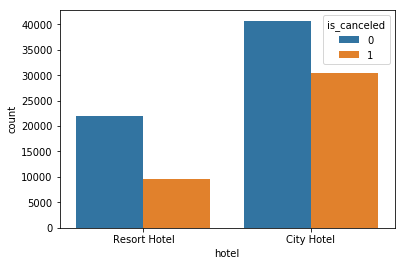

In [34]:
sns.countplot(x='hotel',hue='is_canceled',data=booking)

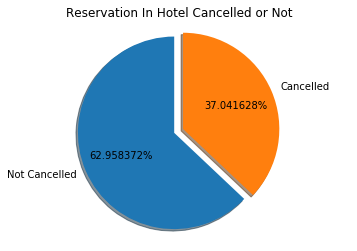

In [35]:
labels = 'Not Cancelled', 'Cancelled'
sizes = [62.958372,37.041628]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%6.6f%%',
        shadow=True, startangle=90,center=(0, 0))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Reservation In Hotel Cancelled or Not')
plt.show()

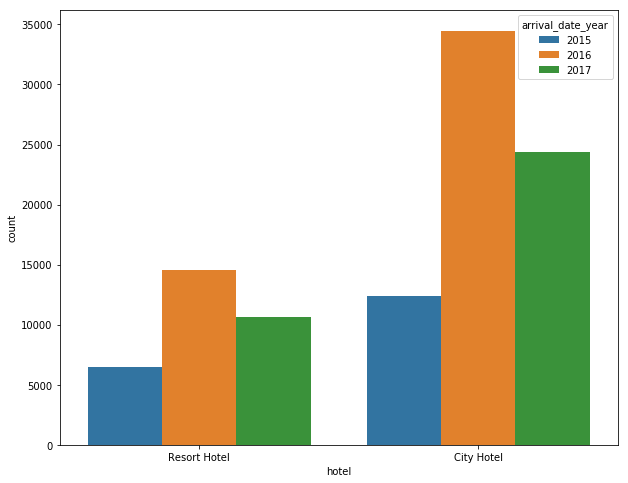

In [36]:
plt.figure(figsize=(10,8))
sns.countplot(x='hotel',hue='arrival_date_year',data=booking)

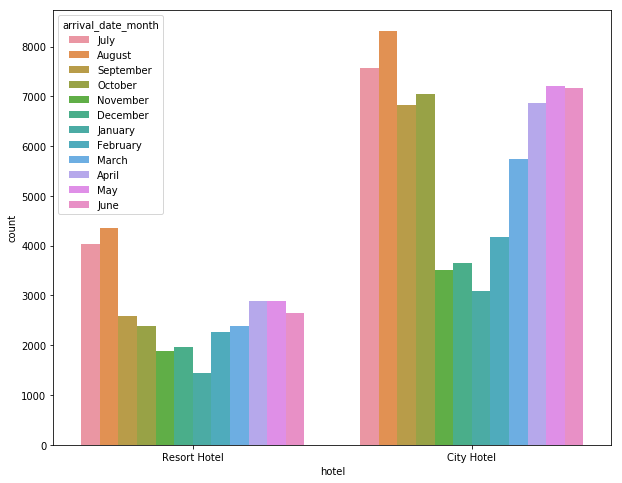

In [37]:
plt.figure(figsize=(10,8))
sns.countplot(x='hotel',hue='arrival_date_month',data=booking)

In [39]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102894 entries, 3 to 119389
Data columns (total 31 columns):
hotel                             102894 non-null object
is_canceled                       102894 non-null int64
lead_time                         102894 non-null int64
arrival_date_year                 102894 non-null int64
arrival_date_month                102894 non-null object
arrival_date_week_number          102894 non-null int64
arrival_date_day_of_month         102894 non-null int64
stays_in_weekend_nights           102894 non-null int64
stays_in_week_nights              102894 non-null int64
adults                            102894 non-null int64
children                          102894 non-null float64
babies                            102894 non-null int64
meal                              102894 non-null object
country                           102894 non-null object
market_segment                    102894 non-null object
distribution_channel              102894 n

In [40]:
booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,No Deposit,303.0,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,2015-05-06


In [42]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
booking['hotel'] = labelEncoder_X.fit_transform(booking['hotel'])
booking['meal'] = labelEncoder_X.fit_transform(booking['meal'])
booking['country'] = labelEncoder_X.fit_transform(booking['country'])
booking['arrival_date_month'] = labelEncoder_X.fit_transform(booking['arrival_date_month'])
booking['market_segment'] = labelEncoder_X.fit_transform(booking['market_segment'])
booking['distribution_channel'] = labelEncoder_X.fit_transform(booking['distribution_channel'])
booking['reserved_room_type'] = labelEncoder_X.fit_transform(booking['reserved_room_type'])
booking['assigned_room_type'] = labelEncoder_X.fit_transform(booking['assigned_room_type'])
booking['deposit_type'] = labelEncoder_X.fit_transform(booking['deposit_type'])
booking['distribution_channel'] = labelEncoder_X.fit_transform(booking['distribution_channel'])
booking['customer_type'] = labelEncoder_X.fit_transform(booking['customer_type'])
booking['reservation_status'] = labelEncoder_X.fit_transform(booking['reservation_status'])
booking['reservation_status_date'] = labelEncoder_X.fit_transform(booking['reservation_status_date'])

In [43]:
y=booking['is_canceled']
X=booking.drop(['is_canceled','reservation_status','adults','children','babies','previous_cancellations','previous_bookings_not_canceled'],axis=1)

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [45]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

In [46]:
#Using Logistic Regression 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print("Accuracy =",accuracy_score(y_test,y_pred))
print("Precision =",precision_score(y_test,y_pred))
print("Recall =",recall_score(y_test,y_pred))
print("F1 Score =",f1_score(y_test,y_pred))

[[18741    20]
 [ 1363 10745]]
Accuracy = 0.9551977712267972
Precision = 0.9981421272642824
Recall = 0.8874297984803435
F1 Score = 0.9395356971101299


In [47]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

print(confusion_matrix(y_test,predictions))
print("Accuracy =",accuracy_score(y_test,predictions))
print("Precision =",precision_score(y_test,predictions))
print("Recall =",recall_score(y_test,predictions))
print("F1 Score =",f1_score(y_test,predictions))

[[17867   894]
 [  862 11246]]
Accuracy = 0.9431144513913635
Precision = 0.9263591433278419
Recall = 0.928807400066072
F1 Score = 0.9275816562190695


In [48]:
#Using Random Forest 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
rfc__pred = rfc.predict(X_test)

print(confusion_matrix(y_test,rfc__pred))
print("Accuracy =",accuracy_score(y_test,rfc__pred))
print("Precision =",precision_score(y_test,rfc__pred))
print("Recall =",recall_score(y_test,rfc__pred))
print("F1 Score =",f1_score(y_test,rfc__pred))

[[18340   421]
 [ 1263 10845]]
Accuracy = 0.9454468884641549
Precision = 0.9626309249067992
Recall = 0.8956888007928642
F1 Score = 0.9279541370753829


In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [50]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
params={"reg_lambda":[1,10,100],"reg_alpha":[1,10,100],"max_depth":[3,5,7,9]}
xg_random=xgb.XGBClassifier(random_state=1)
xg_random_cv=RandomizedSearchCV(estimator=xg_random,param_distributions=params,n_iter=10,cv=3,verbose=1,random_state=1,scoring="roc_auc")
xg_random_cv.fit(X_train,y_train)
print("Best parameters found: ",xg_random_cv.best_params_)
print("Best AUC: ",xg_random_cv.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  6.9min finished


Best parameters found:  {'reg_lambda': 10, 'reg_alpha': 1, 'max_depth': 9}
Best AUC:  0.9912085198013499
